In [34]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [35]:
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')

In [36]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [37]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [39]:
df.shape

(299, 13)

## Data Cleaning

In [40]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [56]:
# change diabetes column data to yes/no flag
df['diabetes'] = df.diabetes.replace({1:'Yes',0:'No'})
# change sex column data to male/female flag
df['sex'] = df.sex.replace({1:'male',0:'female'})
# change high_blood_pressure column data to yes/no flag
df['high_blood_pressure'] = df['high_blood_pressure'].replace({1:'Yes',0:'No'})
# change smoking column data to yes/no flag
df['smoking'] = df['smoking'].replace({1:'Yes',0:'No'})
# DEATH_EVENT_STATUS column to show if person is dead or not dead.
df['DEATH_EVENT_STATUS'] = df['DEATH_EVENT'].replace({1:'DIED',0:'NOT_DIED'})

### 1. What is the distribution of age among heart failure patients in the dataset?

<Axes: xlabel='age', ylabel='Count'>

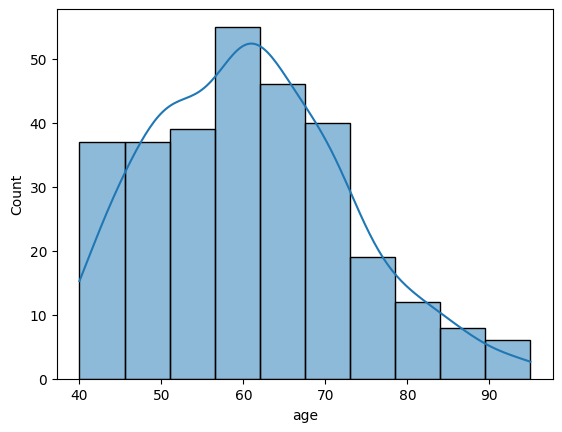

In [42]:
sns.histplot(df['age'], kde=True)
# age distribution is kind of normal distribution.

###  2. How does the death rate vary with age?

In [43]:
# calculate the death rate (total dead people/ total people in that age population) for each age.
age_popln = df.groupby('age').agg(death = ('DEATH_EVENT','sum'), total_pop = ('DEATH_EVENT','count')).reset_index()
age_popln['death_rate'] = age_popln['death']/age_popln['total_pop']

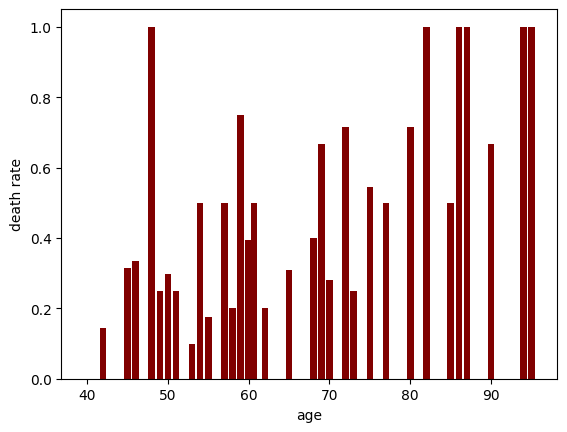

In [67]:
plt.bar(age_popln['age'], age_popln['death_rate'], color ='maroon')
# sns.histplot(x = age_popln['age'], weights = age_popln['death_rate'], color ='maroon', discrete=True, kde=True)
plt.xlabel("age")
plt.ylabel("death rate")

plt.show()

<Axes: xlabel='age', ylabel='Count'>

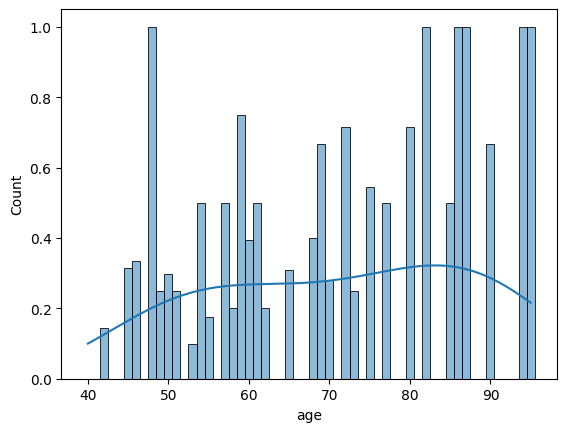

In [45]:
sns.histplot(x = age_popln['age'], weights = age_popln['death_rate'], discrete=True, kde= True)

### 3. What is the percentage of male and female patients in the dataset?

<Axes: ylabel='count'>

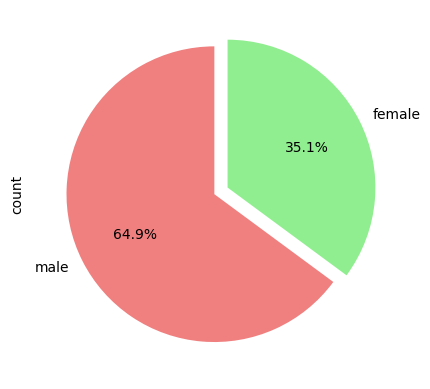

In [46]:
df['sex'].value_counts().plot.pie(autopct = '%1.1f%%', colors = ['lightcoral','lightgreen'], explode = (0,0.1), startangle = 90, labels=df['sex'].value_counts().index)

### 4. How does the platelet count varies with different age groups?

<Axes: xlabel='age_group', ylabel='Count'>

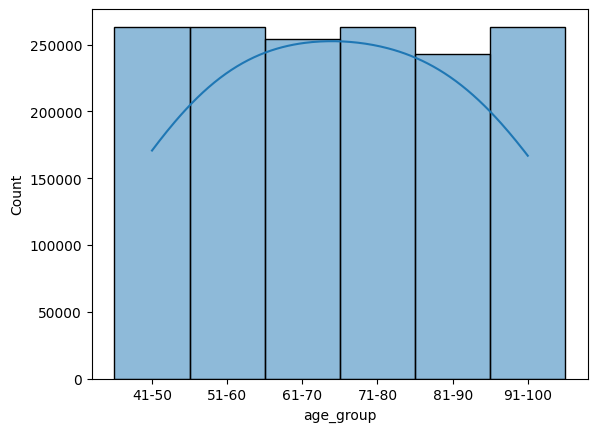

In [47]:
def age_grp(val):
    if val<=20:
        return '<=20'
    elif val>20 and val<30:
        return '21-30'
    elif val>30 and val<40:
        return '31-40'
    elif val>40 and val<=50:
        return '41-50'
    elif val>50 and val<=60:
        return '51-60'
    elif val>60 and val<=70:
        return '61-70'
    elif val>70 and val<=80:
        return '71-80'
    elif val>80 and val<=90:
        return '81-90'
    elif val>90 and val<=100:
        return '91-100'
df['age_group'] = df['age'].apply(age_grp)
ans = df.groupby('age_group', as_index=False)['platelets'].median()
# plt.line(ans['age_group'], ans['platelets'], width=0.5)
# plt.show()
sns.histplot(x = ans['age_group'], weights = ans['platelets'], discrete=True, kde= True)

### 5. Is there any correlation between cretanine and sodium levels in the blood?

In [48]:
df[['serum_creatinine','serum_sodium']].corr()

,serum_creatinine,serum_sodium
serum_creatinine,1.000000,-0.189095
serum_sodium,-0.189095,1.000000


### **Ans:** serum_creatinine and serum_sodium are negatively correlated to each other.

### 6. How does the prevalence of high blood pressure differ between male and female patients?

<Axes: xlabel='high_blood_pressure', ylabel='count'>

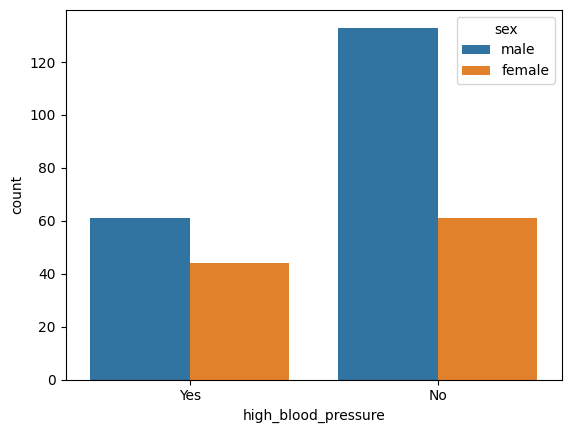

In [49]:
sns.countplot(x=df['high_blood_pressure'], hue=df['sex'])

<Axes: ylabel='count'>

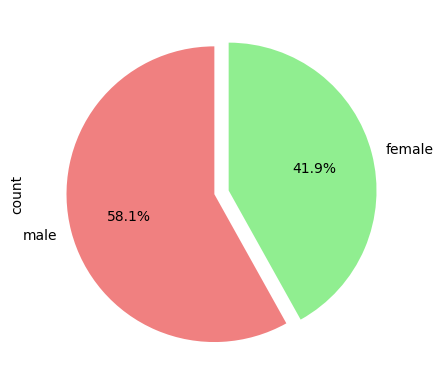

In [69]:
# now check the distribution for the high blood pressure for male and female population only.
ans = df[df['high_blood_pressure']=='Yes']
ans['sex'].value_counts().plot.pie(autopct = '%1.1f%%', colors = ['lightcoral','lightgreen'], explode = (0,0.1), startangle = 90, labels=ans['sex'].value_counts().index)

### **Ans:** The blood pressure is high in males.

### 7. What is the relationship between smoking habits and occurence of heart failure?

<Axes: xlabel='smoking', ylabel='count'>

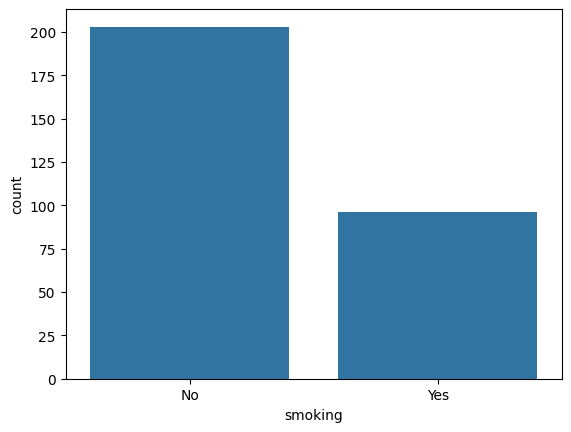

In [70]:
# Ideally we have seen that popultion who doesn't smoke has high heart failure cases.
sns.countplot(x = df['smoking'])

### 8. Are there any noticeable patterns in the distribution of death events accross age group?

<Axes: xlabel='age_group', ylabel='Count'>

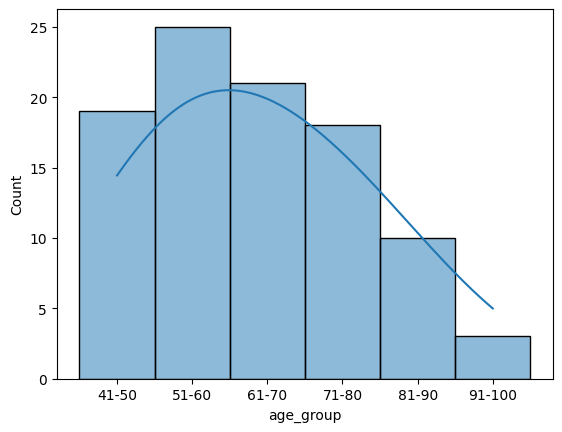

In [50]:
ans = df.groupby('age_group', as_index=False)['DEATH_EVENT'].sum()
sns.histplot(x = ans['age_group'], weights = ans['DEATH_EVENT'], discrete=True, kde= True)

### **Ans:** It is a normal distribution.

### 9. Is there any significant difference in ejection fraction between patients with and without diabetes?

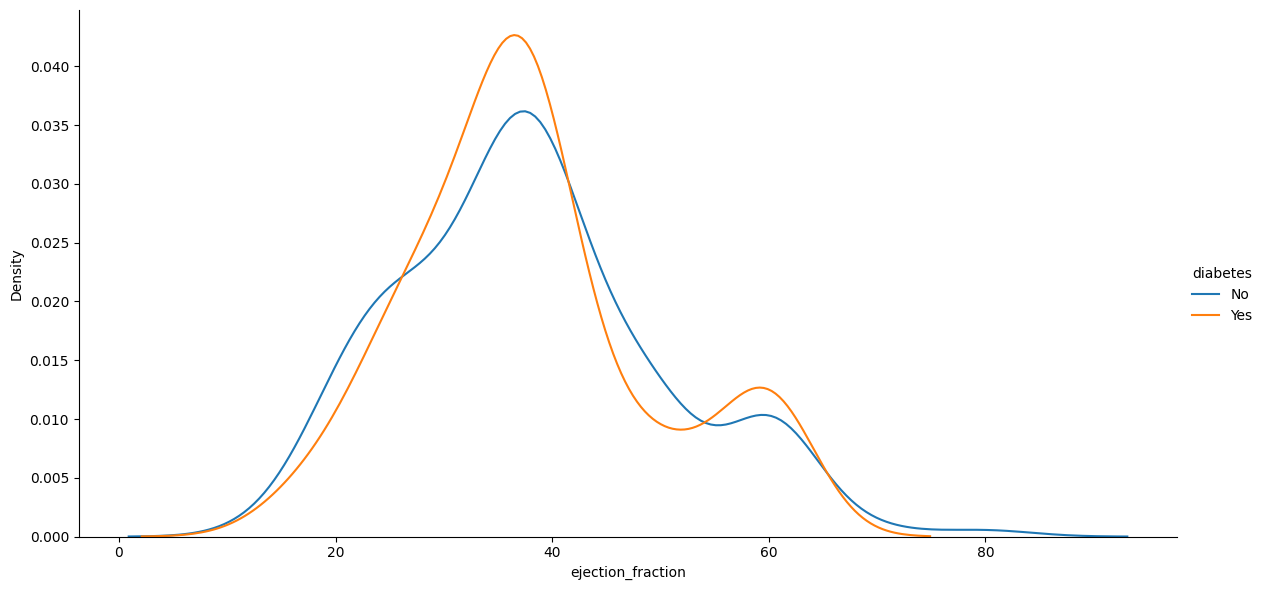

In [51]:
def kde(col, hue_val):
    grid = sns.FacetGrid(df, hue = hue_val, height = 6, aspect=2)
    grid.map(sns.kdeplot, col)
    grid.add_legend()
kde(col='ejection_fraction' ,hue_val='diabetes')

### 10. How does the serum cretanine level vary between patients who survived and those who did not?

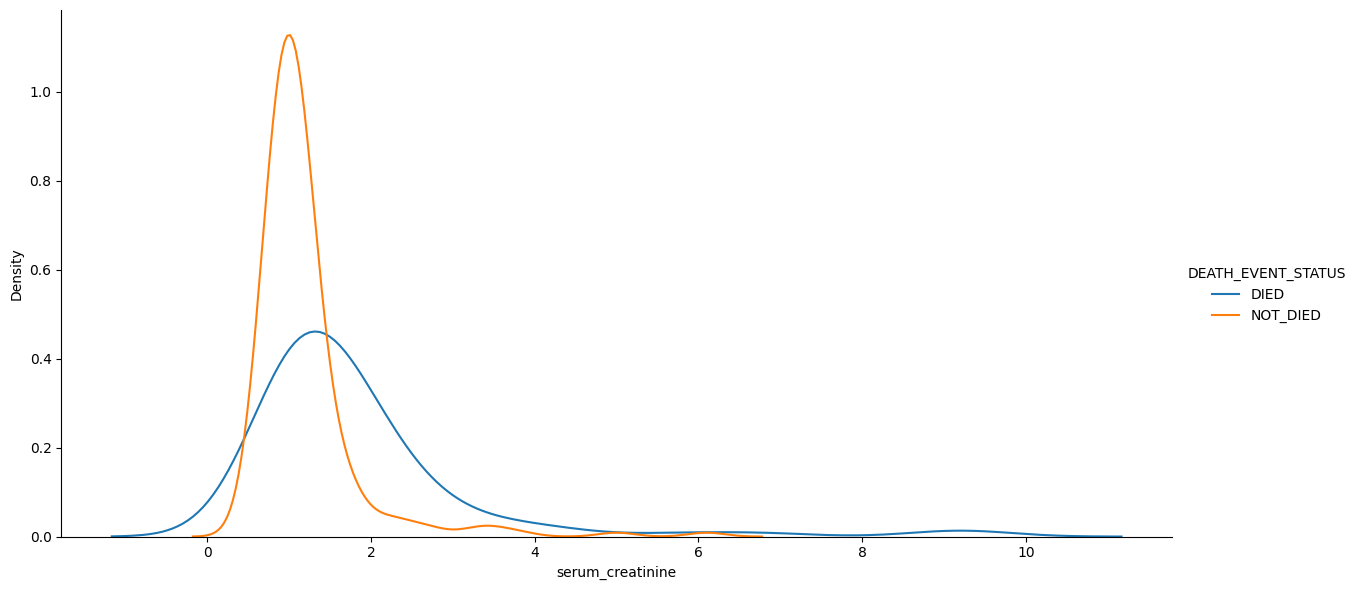

In [53]:
kde(col='serum_creatinine', hue_val='DEATH_EVENT_STATUS')

### **Ans:** Dead population has greater variance for serum_creatinine than patients who don't died.